Importing required packages

In [1]:
import pandas as pd
import os, glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

We have 4000 text files (each corresponding to a recorded data on an optical channel for 14 months). A group of files (channels) belong to some specific optical link or segment.

The goal is to group/merge all the files belonging to some specific segment while preserving the information of channel (i.e., channel number). The information about channel and segment numbers is available in the file names so we have to extract this information also.

Following function extracts and returns segment number from the file name.

In [2]:
def get_segment_no(file_name):
    
    base_name = os.path.basename(file_name)     #extracts file name from the path
    file_without_ext = os.path.splitext(base_name)[0]  #file name without extension
    segment_no = file_without_ext.split("segment_")[-1]   #getting segment number
    
    return segment_no

Following function extracts and returns channel number from the file name.

In [3]:
def get_channel_no(file_name):
    base_name = os.path.basename(file_name)
    channel_no = base_name.split("_")[1]   # using _ as a delimeter here and extracting second element i.e, 1 in the list
#     print (channel_no)    
    return channel_no

Specifying the folder directory and the extension of files that need to be opended.



In [4]:
folder = r"your folder's directory"
file_list = glob.glob(os.path.join(folder, '*.txt'))

In [5]:
# creating an empty dictionary to store the grouped files
groups = {}

With following for loop, we open each file (.txt) in the directory, add new column to store its channel number and then saving the upated file as .csv with the same name in the same directory.

In [6]:
for file_path in file_list:
    df = pd.read_table(file_path, sep='\t',  header = None)
    df["channel"] = get_channel_no(file_path)
    df.to_csv(file_path, index = False)  #save it to csv file again (text file with comma seperator)

In [7]:
# iterate over the list of files
for file_path in file_list:
    
    file_name = os.path.basename(file_path)
    group_name = get_segment_no(file_name) # get segment number
    
    # if the group_name doesn't exist in the dictionary, create it and add the file to it
    
    if group_name not in groups:
        groups[group_name] = [file_path]
    else:
        groups[group_name].append(file_path)

In [8]:
for group_name, files in groups.items():
    # create a new file to store the merged contents
    with open(os.path.join(folder, str(group_name) + '_optical_link.txt'), 'w') as outfile:
        for file_path in files:
            # open each file in the group and read its contents
            with open(file_path, 'r') as infile:
                outfile.write(infile.read())

Data for each link has been merged and stored now! Opening one of those files and doing some further manipulation!

In [9]:
file_path_new = os.path.join(folder, "75_optical_link.txt")    # we can change the file name here
df_optical_link = pd.read_csv(file_path_new)   #csv because data is sepearated using comma in text files

In [10]:
df_optical_link.head(5)

,0,1,2,3,4,channel
0,2015.02.02.12.00.00,15.07,-9.68,183.03,7.56,2741
1,2015.02.02.12.15.00,15.08,-9.68,182.62,7.94,2741
2,2015.02.02.12.30.00,15.08,-9.68,182.59,7.80,2741
3,2015.02.02.12.45.00,15.08,-9.68,182.91,7.93,2741
4,2015.02.02.13.00.00,15.08,-9.68,184.52,7.74,2741


In [11]:
updated_column_names = ["Date_time","Q_factor", "Transmitted_power", "CD", "PMD", "Channel"]

df_optical_link.columns = updated_column_names
df_optical_link.head(5)

,Date_time,Q_factor,Transmitted_power,CD,PMD,Channel
0,2015.02.02.12.00.00,15.07,-9.68,183.03,7.56,2741
1,2015.02.02.12.15.00,15.08,-9.68,182.62,7.94,2741
2,2015.02.02.12.30.00,15.08,-9.68,182.59,7.80,2741
3,2015.02.02.12.45.00,15.08,-9.68,182.91,7.93,2741
4,2015.02.02.13.00.00,15.08,-9.68,184.52,7.74,2741


In [12]:
df_optical_link.shape

(2032859, 6)

In [13]:
df_optical_link['Channel'].unique()

array(['2741', 'channel', '2742', '2743', '2744', '2745', '2746', '2747',
       '2748', '2749', '2750', '2751', '2752', '2753', '2754', '2755',
       '2756', '2757', '2758', '2759', '2760', '2761', '2762', '2763',
       '2764', '2765', '2766', '2767', '2768', '2769', '2770', '2771',
       '2772', '2773', '2774', '2775', '2776', '2777', '2778', '2779',
       '2780', '2781', '2782', '2783', '2784', '2785', '2786', '2787',
       '2788', '2789', '2790', '2791', '2792', '2793', '2794', '2795',
       '2796', '2797', '2798', '2799', '2800'], dtype=object)

In [14]:
df_optical_link[df_optical_link.Channel == "channel"].shape

(59, 6)

Dropping all rows where 'Channel' column has non-numeric values (i.e., channel).

In [15]:
df_optical_link = df_optical_link[df_optical_link.Channel != "channel"]
df_optical_link.shape

(2032800, 6)

In [16]:
df_optical_link['Channel'].unique()

array(['2741', '2742', '2743', '2744', '2745', '2746', '2747', '2748',
       '2749', '2750', '2751', '2752', '2753', '2754', '2755', '2756',
       '2757', '2758', '2759', '2760', '2761', '2762', '2763', '2764',
       '2765', '2766', '2767', '2768', '2769', '2770', '2771', '2772',
       '2773', '2774', '2775', '2776', '2777', '2778', '2779', '2780',
       '2781', '2782', '2783', '2784', '2785', '2786', '2787', '2788',
       '2789', '2790', '2791', '2792', '2793', '2794', '2795', '2796',
       '2797', '2798', '2799', '2800'], dtype=object)

In [17]:
df_optical_link["Channel"] = pd.to_numeric(df_optical_link["Channel"])
df_optical_link["Channel"].value_counts().sort_index()

2741    35948
2742    35948
2743    35948
2744    35948
2745    35948
2746    35948
2747    35948
2748    35948
2749    35948
2750    35948
2751    35934
2752    35934
2753    35934
2754    35934
2755    35934
2756    35934
2757    35934
2758    35934
2759    35934
2760    35934
2761    29830
2762    29830
2763    29830
2764    29830
2765    29830
2766    29830
2767    29830
2768    29830
2769    29830
2770    29830
2771    29931
2772    29931
2773    29931
2774    29931
2775    29931
2776    29931
2777    29931
2778    29931
2779    29931
2780    29931
2781    35936
2782    35936
2783    35936
2784    35936
2785    35936
2786    35936
2787    35936
2788    35936
2789    35936
2790    35936
2791    35701
2792    35701
2793    35701
2794    35701
2795    35701
2796    35701
2797    35701
2798    35701
2799    35701
2800    35701
Name: Channel, dtype: int64

In [18]:
df_optical_link.head(5)

,Date_time,Q_factor,Transmitted_power,CD,PMD,Channel
0,2015.02.02.12.00.00,15.07,-9.68,183.03,7.56,2741
1,2015.02.02.12.15.00,15.08,-9.68,182.62,7.94,2741
2,2015.02.02.12.30.00,15.08,-9.68,182.59,7.80,2741
3,2015.02.02.12.45.00,15.08,-9.68,182.91,7.93,2741
4,2015.02.02.13.00.00,15.08,-9.68,184.52,7.74,2741


Now, we can probably sepeate date and time in two different columns!


In [19]:
df_optical_link['Date_time'] = pd.to_datetime(df_optical_link['Date_time'],  format = '%Y.%m.%d.%H.%M.%S')

# Extract date and time as separate columns
df_optical_link['date'] = df_optical_link['Date_time'].dt.date
df_optical_link['time'] = df_optical_link['Date_time'].dt.time

df_optical_link.drop("Date_time", axis = "columns", inplace = True)
df_optical_link.head(5)

,Q_factor,Transmitted_power,CD,PMD,Channel,date,time
0,15.07,-9.68,183.03,7.56,2741,2015-02-02,12:00:00
1,15.08,-9.68,182.62,7.94,2741,2015-02-02,12:15:00
2,15.08,-9.68,182.59,7.80,2741,2015-02-02,12:30:00
3,15.08,-9.68,182.91,7.93,2741,2015-02-02,12:45:00
4,15.08,-9.68,184.52,7.74,2741,2015-02-02,13:00:00


Plotting Q-factor w.r.t. date for some specific channel:

Here let's say Channel = 2792


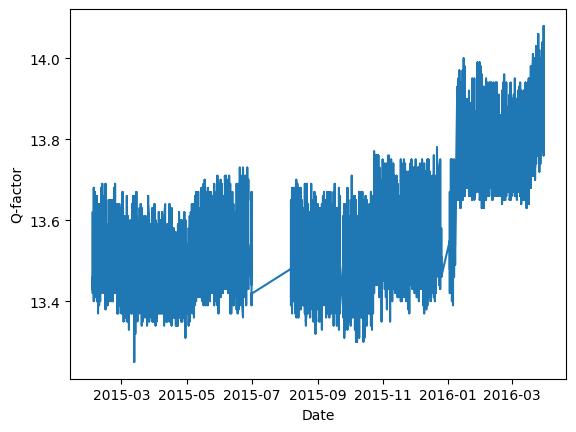

In [20]:
channel_number = 2792

df_temp =  df_optical_link[df_optical_link.Channel == channel_number]
df_temp.set_index('date', inplace=True)

# Plot the data
plt.plot(df_temp.index, df_temp['Q_factor'])
# plt.ylim([14.4, 15.0])
# plt.ylim([14.4, 15.0])
plt.xlabel('Date')
plt.ylabel('Q-factor')
plt.show()

Further manipulation like outliers removal, or averaging data for some specific window can also be performed if desired which is not too difficult.